# Flights in the United States
## by Benoît Courty

## Preliminary Wrangling

This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 1987 to 2008.

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
def pv(variable):
    if(len(variable)>1): print(variable, ":", eval(variable))

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

### Downloading the datasets

#The dataset consisist of a file per year.
#We will look over a list of availiable years and concatenate the DataFrame.
Source : 
http://stat-computing.org/dataexpo/2009/1987.csv.bz2

In [3]:
import os
import requests
folder_name = "./"

def download_files(folder_name):
    years = []
    for year in range(1987, 2008):
        years.append(year)  
        url = "http://stat-computing.org/dataexpo/2009/" + str(year) + ".csv.bz2"
        filename = url.split('/')[-1]
        response = requests.get(url)
        with open(os.path.join(folder_name, filename), mode='wb') as file:
            file.write(response.content)
    print("Files retreived !")

years = []
#years = download_file()
print(years)

[]


### LOading the dataset

In [15]:
import pandas as pd


years = ['1987']
df = pd.DataFrame()
for year in years:
    datafilename = folder_name + year + '.csv.bz2'
    print(datafilename)
    df_temp = pd.read_csv(datafilename)
    df = pd.concat([df, df_temp])


./1987.csv.bz2


In [5]:
df.head(3)
df.tail(3)
df.columns
df.dtypes
df.describe()
df.info()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1987,10,14,3,741.0,730,912.0,849,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1987,10,15,4,729.0,730,903.0,849,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1987,10,17,6,741.0,730,918.0,849,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1311823,1987,12,14,1,1530.0,1530,1807.0,1823,CO,638,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1311824,1987,12,1,2,1525.0,1525,1643.0,1638,CO,639,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1311825,1987,12,2,3,1540.0,1525,1706.0,1638,CO,639,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum              float64
ActualElapsedTime    float64
CRSElapsedTime         int64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance             float64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode     float64
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1311826.0,1.311826e+06,1.311826e+06,1.311826e+06,1.292141e+06,1.311826e+06,1.288326e+06,1.311826e+06,1.311826e+06,0.0,...,0.0,0.0,1.311826e+06,0.0,1.311826e+06,0.0,0.0,0.0,0.0,0.0
mean,1987.0,1.099374e+01,1.571761e+01,3.949043e+00,1.369276e+03,1.361131e+03,1.493152e+03,1.491052e+03,6.701427e+02,NaN,...,NaN,NaN,1.500580e-02,NaN,2.908160e-03,NaN,NaN,NaN,NaN,NaN
std,0.0,8.232012e-01,8.835640e+00,1.986290e+00,4.787183e+02,4.719701e+02,4.987503e+02,4.868002e+02,5.145510e+02,NaN,...,NaN,NaN,1.215756e-01,NaN,5.384891e-02,NaN,NaN,NaN,NaN,NaN
min,1987.0,1.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,...,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,1987.0,1.000000e+01,8.000000e+00,2.000000e+00,9.460000e+02,9.400000e+02,1.117000e+03,1.115000e+03,2.910000e+02,NaN,...,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
50%,1987.0,1.100000e+01,1.600000e+01,4.000000e+00,1.345000e+03,1.338000e+03,1.521000e+03,1.519000e+03,5.600000e+02,NaN,...,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
75%,1987.0,1.200000e+01,2.300000e+01,6.000000e+00,1.750000e+03,1.742000e+03,1.918000e+03,1.912000e+03,8.940000e+02,NaN,...,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
max,1987.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,6.282000e+03,NaN,...,NaN,NaN,1.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311826 entries, 0 to 1311825
Data columns (total 29 columns):
Year                 1311826 non-null int64
Month                1311826 non-null int64
DayofMonth           1311826 non-null int64
DayOfWeek            1311826 non-null int64
DepTime              1292141 non-null float64
CRSDepTime           1311826 non-null int64
ArrTime              1288326 non-null float64
CRSArrTime           1311826 non-null int64
UniqueCarrier        1311826 non-null object
FlightNum            1311826 non-null int64
TailNum              0 non-null float64
ActualElapsedTime    1288326 non-null float64
CRSElapsedTime       1311826 non-null int64
AirTime              0 non-null float64
ArrDelay             1288326 non-null float64
DepDelay             1292141 non-null float64
Origin               1311826 non-null object
Dest                 1311826 non-null object
Distance             1310811 non-null float64
TaxiIn               0 non-null float64
Taxi

In [6]:
def explore_value(df):
    to_be_removed = []
    columns = df.columns
    for column in columns:
        nb_unique_values = eval('df.' + column + '.nunique()')
        #print("Distinct values in", column, ":", nb_unique_values)
        if nb_unique_values > 10:
            to_be_removed.append(column)
    columns_redux = [item for item in columns if item not in to_be_removed ]
    
    #print(columns_redux)
    for column in columns_redux:
        
        code = 'df.' + column + '.value_counts()'
        print("Distinct values in", column, ':', code)
        print(eval(code))

explore_value(df)

Distinct values in Year : df.Year.value_counts()
1987    1311826
Name: Year, dtype: int64
Distinct values in Month : df.Month.value_counts()
10    448620
12    440403
11    422803
Name: Month, dtype: int64
Distinct values in DayOfWeek : df.DayOfWeek.value_counts()
4    200911
1    190711
2    190238
3    190235
5    184913
7    181448
6    173370
Name: DayOfWeek, dtype: int64
Distinct values in TailNum : df.TailNum.value_counts()
Series([], Name: TailNum, dtype: int64)
Distinct values in AirTime : df.AirTime.value_counts()
Series([], Name: AirTime, dtype: int64)
Distinct values in TaxiIn : df.TaxiIn.value_counts()
Series([], Name: TaxiIn, dtype: int64)
Distinct values in TaxiOut : df.TaxiOut.value_counts()
Series([], Name: TaxiOut, dtype: int64)
Distinct values in Cancelled : df.Cancelled.value_counts()
0    1292141
1      19685
Name: Cancelled, dtype: int64
Distinct values in CancellationCode : df.CancellationCode.value_counts()
Series([], Name: CancellationCode, dtype: int64)
Distinc

https://www.transtats.bts.gov/FieldInfo.asp?Field_Desc=Specifies%20The%20Reason%20For%20Cancellation&Field_Type=Char&Lookup_Table=L_CANCELLATION&Table_ID=236&SYS_Table_Name=T_ONTIME_REPORTING&Sys_Field_Name=CANCELLATION_CODE

    Code	Description
    A	Carrier
    B	Weather
    C	National Air System
    D	Security

    If Cancelled==1 it mean the flight has been canceled
    If Diverted==1 it mean the flight has been delayed

    Variable descriptions from http://stat-computing.org/dataexpo/2009/the-data.html
        Name 	Description
    1 	Year 	1987-2008
    2 	Month 	1-12
    3 	DayofMonth 	1-31
    4 	DayOfWeek 	1 (Monday) - 7 (Sunday)
    5 	DepTime 	actual departure time (local, hhmm)
    6 	CRSDepTime 	scheduled departure time (local, hhmm)
    7 	ArrTime 	actual arrival time (local, hhmm)
    8 	CRSArrTime 	scheduled arrival time (local, hhmm)
    9 	UniqueCarrier 	unique carrier code
    10 	FlightNum 	flight number
    11 	TailNum 	plane tail number
    12 	ActualElapsedTime 	in minutes
    13 	CRSElapsedTime 	in minutes
    14 	AirTime 	in minutes
    15 	ArrDelay 	arrival delay, in minutes
    16 	DepDelay 	departure delay, in minutes
    17 	Origin 	origin IATA airport code
    18 	Dest 	destination IATA airport code
    19 	Distance 	in miles
    20 	TaxiIn 	taxi in time, in minutes
    21 	TaxiOut 	taxi out time in minutes
    22 	Cancelled 	was the flight cancelled?
    23 	CancellationCode 	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
    24 	Diverted 	1 = yes, 0 = no
    25 	CarrierDelay 	in minutes
    26 	WeatherDelay 	in minutes
    27 	NASDelay 	in minutes
    28 	SecurityDelay 	in minutes
    29 	LateAircraftDelay 	in minutes


In [8]:
df.query("CarrierDelay > 0 and WeatherDelay > 0")

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay


### What is the structure of your dataset?

The dataset is a series of CSV containing one line per flight in the US. With many informations about the fligth : origin, destination, date, reason of delay...

Only the internal US fligth, not the international fligth arriving in the US.


### What is/are the main feature(s) of interest in your dataset?

> Are there certain destination or arrival cities that are home to more delays or cancellations?

- Evolution of delay type over time
- Airport that are more subject to delay ?
- More security delay after 11 september 2001 ?
- What root cause lead to more delay in terme of time.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!
Delay cause
Airport
Carrier
Delay time

## Tidy
Put delay time in one column ?


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [10]:
df['ArrDelay'].max()

1033.0

[   0.   50.  100.  150.  200.  250.  300.  350.  400.  450.  500.  550.
  600.  650.  700.  750.  800.  850.  900.  950. 1000. 1050.]


<Figure size 576x360 with 0 Axes>

(array([8.0880e+05, 4.4049e+04, 9.8060e+03, 3.2490e+03, 1.4270e+03,
        6.7500e+02, 3.4500e+02, 1.4100e+02, 5.7000e+01, 3.1000e+01,
        2.1000e+01, 9.0000e+00, 4.0000e+00, 3.0000e+00, 2.0000e+00,
        2.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000., 1050.]),
 <a list of 21 Patch objects>)

Text(0.5, 0, 'ArrDelay (min)')

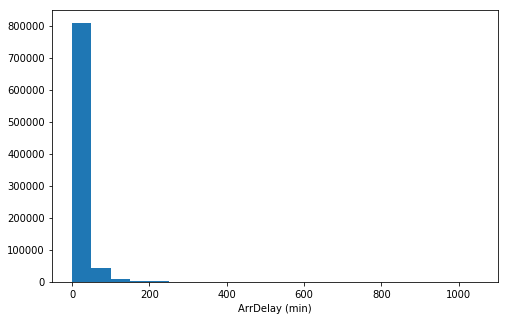

In [13]:
# start with a standard-scaled plot
binsize = 50
bins = np.arange(0, df['ArrDelay'].max()+binsize, binsize)
print(bins)
plt.figure(figsize=[8, 5])
plt.hist(data = df[np.isfinite(df['ArrDelay'])], x = 'ArrDelay', bins = bins)
plt.xlabel('ArrDelay (min)')
plt.show()


> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [ ]:
Violin plot ?

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!